In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("C:\\Users\gowtham regeti\\OwnWork\\datasets\\Bengaluru_House_Data.csv")
df.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00


In [4]:
df.groupby('location')['location'].agg('count').sort_values(ascending = False)

location
Whitefield             540
Sarjapur  Road         399
Electronic City        302
Kanakpura Road         273
Thanisandra            234
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1305, dtype: int64

In [5]:
df2 = df.drop(['area_type','availability','society','balcony'],axis = 'columns')
df2.head(3)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00


In [6]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df2 = df2.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df2['bhk'] = df2['size'].apply(lambda x:int(x.split(' ')[0]))
df2.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [9]:
df2[df2.bhk > 12]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
3379,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,550.0,16
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43
4916,1Channasandra,14 BHK,1250,15.0,125.0,14
9935,1Hoysalanagar,13 BHK,5425,13.0,275.0,13
11559,1Kasavanhalli,18 Bedroom,1200,18.0,200.0,18


In [10]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [11]:
def is_float(x):
        try:
            float(x)
        except:
            return False
        return True

In [12]:
df2[~df2.total_sqft.apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [13]:
def convert_float(x):
    y = x.split('-')
    if len(y) == 2:
        return (float(y[0]) + float(y[1]))/2
    try:
        return float(x)
    except:
        return None

def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None 

In [14]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
df2.total_sqft.isnull().sum(),df2.head(3)

(0,
                    location       size total_sqft  bath   price  bhk
 0  Electronic City Phase II      2 BHK       1056   2.0   39.07    2
 1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00    4
 2               Uttarahalli      3 BHK       1440   2.0   62.00    3)

In [16]:
df2.total_sqft = df2.total_sqft.apply(convert_float)
#df2[~df2.total_sqft.apply(is_float)]
df2.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [17]:
df2.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [18]:
df2[df2.total_sqft.isnull()]

,location,size,total_sqft,bath,price,bhk
410,Kengeri,1 BHK,NaN,1.0,18.50,1
648,Arekere,9 Bedroom,NaN,9.0,265.00,9
775,Basavanagara,1 BHK,NaN,2.0,93.00,1
872,Singapura Village,2 BHK,NaN,2.0,45.00,2
1019,Marathi Layout,1 Bedroom,NaN,1.0,110.00,1
1086,Narasapura,2 Bedroom,NaN,2.0,29.50,2
1400,Chamrajpet,9 BHK,NaN,9.0,296.00,9
1712,Singena Agrahara,3 Bedroom,NaN,3.0,95.00,3
1743,Hosa Road,3 BHK,NaN,3.0,115.00,3
1821,Sarjapur,3 Bedroom,NaN,3.0,76.00,3


In [19]:
df3 = df2.copy()
df3.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [20]:
df3.dropna(inplace = True)

In [21]:
df3['price per sqft'] = df3['price']*100000/df3['total_sqft']
df3.head(3)

,location,size,total_sqft,bath,price,bhk,price per sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556


In [22]:
location_stats = df3.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield             532
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         264
Thanisandra            232
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1298, dtype: int64

In [23]:
len(location_stats[location_stats > 10])

240

In [24]:
location_less10 = location_stats[location_stats < 10]
location_less10

location
Kamakshipalya              9
Sector 1 HSR Layout        9
Vishwanatha Nagenahalli    9
4th Block Koramangala      9
Ejipura                    9
                          ..
 Banaswadi                 1
Kanakadasa Layout          1
Kanakapur main road        1
Kanakapura  Rod            1
whitefiled                 1
Name: location, Length: 1045, dtype: int64

In [25]:
df3.location = df3.location.apply(lambda x:'other' if x in location_less10 else x)
df3.location.value_counts()

other                   2757
Whitefield               532
Sarjapur  Road           392
Electronic City          302
Kanakpura Road           264
                        ... 
Nagappa Reddy Layout      10
BTM 1st Stage             10
Basapura                  10
Kalkere                   10
Nagadevanahalli           10
Name: location, Length: 254, dtype: int64

In [26]:
df3.shape

(13200, 7)

In [27]:
df4 = df3.copy()
df4.shape

(13200, 7)

In [28]:
df4[df4.total_sqft/df4.bhk<300].shape

(744, 7)

In [29]:
df5 = df4[~(df4.total_sqft/df4.bhk<300)]
df5.shape

(12456, 7)

In [30]:
df5['zscore'] = (df5['price per sqft']-df5['price per sqft'].mean())/df5['price per sqft'].std()
df5[(df5.zscore > 1) | (df5.zscore <-1)].head()

C:\Users\GOWTHA~1\AppData\Local\Temp/ipykernel_20876/652643832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['zscore'] = (df5['price per sqft']-df5['price per sqft'].mean())/df5['price per sqft'].std()


,location,size,total_sqft,bath,price,bhk,price per sqft,zscore
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181.818182,2.848597
11,Whitefield,4 Bedroom,2785.0,5.0,295.0,4,10592.459605,1.027789
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571.428571,1.742491
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250.000000,2.385123
57,other,2 BHK,1500.0,2.0,185.0,2,12333.333333,1.445453


In [31]:
df5 = df5[(df5.zscore < 1) & (df5.zscore >-1)]
df5.shape

(11294, 8)

No handles with labels found to put in legend.


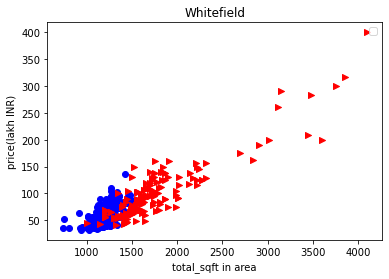

In [32]:
def plot_tsqft_bhk(df,location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color = "blue")
    plt.scatter(bhk3.total_sqft,bhk3.price,marker = ">",color = "red")
    plt.xlabel("total_sqft in area")
    plt.ylabel("price(lakh INR)")
    plt.title(location)
    plt.legend()
plot_tsqft_bhk(df5,"Whitefield")

In [33]:
df5.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price per sqft', 'zscore'],
      dtype='object')

In [34]:
df5['price per sqft'].describe()

count    11294.000000
mean      5371.339321
std       1667.328621
min       2149.277061
25%       4123.711340
50%       5091.925499
75%       6363.636364
max      10476.190476
Name: price per sqft, dtype: float64

In [35]:
def remove_bhk_outliers(df):
    excludes = np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk,bhk_df in df.groupby('bhk'):
            bhk_stats[bhk]={
                "mean":bhk_df["price per sqft"].mean(),
                "std":np.std(bhk_df["price per sqft"]),
                "count":bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                excludes = np.append(excludes,bhk_df[bhk_df['price per sqft']<stats['mean']].index.values)
        return df.drop(excludes,axis = 'index')
df6 = remove_bhk_outliers(df5)
df6.shape

(11283, 8)

In [36]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df["price per sqft"]),
                'std': np.std(bhk_df['price per sqft']),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df["price per sqft"]<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df6 = remove_bhk_outliers(df5)
df6.shape

(8161, 8)

In [37]:
df6[df6.bath>8]

,location,size,total_sqft,bath,price,bhk,price per sqft,zscore
459,other,11 BHK,5000.0,9.0,360.0,11,7200.000000,0.213884
538,Mico Layout,9 BHK,5000.0,9.0,210.0,9,4200.000000,-0.505863
2620,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689,0.602524
2826,Kadugodi,9 Bedroom,6200.0,9.0,200.0,9,3225.806452,-0.739588
3096,other,10 BHK,12000.0,12.0,525.0,10,4375.000000,-0.463878
3609,other,16 BHK,10000.0,16.0,550.0,16,5500.000000,-0.193973
5847,Vidyaranyapura,9 BHK,4700.0,10.0,130.0,9,2765.957447,-0.849913
7979,other,11 BHK,6000.0,12.0,150.0,11,2500.000000,-0.913720
8050,Raja Rajeshwari Nagar,9 Bedroom,3600.0,9.0,240.0,9,6666.666667,0.085929
8636,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000,-0.553847


In [38]:
df7 = df6[df6.bath < df6.bhk+2]
df7.shape

(8081, 8)

In [39]:
df8 = df7.drop(['price per sqft','zscore','size'],axis="columns")
df8.head(3)


,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3


In [40]:
dummy = pd.get_dummies(df8.location)
dummy = dummy.drop('other',axis = 'columns')

In [41]:
df9 = pd.concat([df8.drop(['location'],axis = 'columns'),dummy],axis = 'columns')
df9.head()

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,39.07,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2732.0,4.0,204.00,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
X = df9.drop(['price'],axis = 'columns')
y = df9.price

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size  = .2)

In [50]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

-1.0735362521162244e+16

In [51]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits = 5, test_size = 0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)


array([-1.02960014e+15,  8.49503247e-01,  8.29029064e-01,  8.66090721e-01,
        9.11713414e-01])

In [52]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def find_best_model(X,y):
    algos = {
        'linear_reg':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2,random_state=0)
    for algo_name,config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model(X,y)


,model,best_score,best_params
0,linear_reg,-2.059200e+14,{'normalize': False}
1,lasso,8.183193e-01,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,8.074961e-01,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [53]:
def predict_price(loc,sqft,bath,bhk):
  loc_index = np.where(X.columns == loc)[0][0]
  x = np.zeros(len(X.columns))
  x[0] = sqft
  x[1] = bath
  x[2] = bhk
  if loc_index >=0 :
    x[loc_index] = 1
  return lr.predict([x])[0]

In [54]:
predict_price('1st Phase JP Nagar',1000,3,3)

84.37412948807425

In [55]:
predict_price('Indira Nagar',2000,3,3)

162.85312232602655

In [56]:
import pickle
with open('bengalore_home_prices_model.pickle','wb') as f:
  pickle.dump(lr,f)

In [57]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
  f.write(json.dumps(columns))